<a href="https://colab.research.google.com/github/ashleydelarm/Capstone/blob/main/CapstoneASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I will be training convolutional neural networks for image recognition of hands making American Sign Language gestures - specifically fingerspelling of the letters A-Z - in an attempt to recognize and relay what letter is being signed. To do this, I will lead in the data, break it into trainng and testing sets, and create several CNNs to train the data for the image recognition. I will then. determine which model is the most acccurate and successful. 

Importing all of the necessary packages. If I need to import another package later in the project, I will put it in the below code block 

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import keras
import tensorflow 
print ("TensorFlow version: " + tensorflow.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.6.0
Keras version: 2.6.0


In [4]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import keras
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import sys
import os
import numpy as np
import random
import torch
import time
import tensorflow_hub as hub

In [6]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/ColabNotebooks/asl_small/asl_small_train/asl_small_train' #1300 images (small version)
test_data_dir = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_test/asl_alphabet_test'   #26 images
train_data_large = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train'  


#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

In [7]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data_small = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

train_data = datagen.flow_from_directory(
        train_data_large,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 1300 images belonging to 26 classes.
Found 77740 images belonging to 26 classes.
Found 286 images belonging to 26 classes.


In [8]:
print(train_data_dir)

/content/drive/MyDrive/ColabNotebooks/asl_small/asl_small_train/asl_small_train


In [9]:
path = '/content/drive/MyDrive/ColabNotebooks/asl/asl_alphabet_train/asl_alphabet_train/A/A2.jpg'

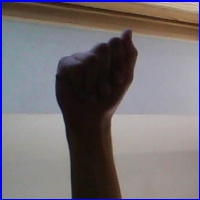

In [10]:
#import Image
from IPython.display import Image
Image(path)

In [11]:
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
def create_model():
  model = Sequential()
  model.add(Conv2D(26, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(Conv2D(26, (3, 3), activation = 'relu'))
  model.add(Conv2D(26, (3, 3), activation = 'relu'))
  model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
  model.add(Dense(26)) #fully-connected layer
  model.add(Dense(26,activation=tf.keras.activations.softmax))

  # need to compile the model before you can use it
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  return model

model = create_model()

Epoch 1/10
41/41 [==============================] - 521s 12s/step - loss: 2.4696 - categorical_accuracy: 0.2985 - val_loss: 3.2505 - val_categorical_accuracy: 0.1538
Epoch 2/10
41/41 [==============================] - 4s 90ms/step - loss: 0.8143 - categorical_accuracy: 0.7669 - val_loss: 6.3547 - val_categorical_accuracy: 0.2832
Epoch 3/10
41/41 [==============================] - 4s 85ms/step - loss: 0.3778 - categorical_accuracy: 0.8923 - val_loss: 6.4145 - val_categorical_accuracy: 0.2937
Epoch 4/10
41/41 [==============================] - 3s 84ms/step - loss: 0.2613 - categorical_accuracy: 0.9300 - val_loss: 7.3290 - val_categorical_accuracy: 0.3147
Epoch 5/10
41/41 [==============================] - 3s 83ms/step - loss: 0.1219 - categorical_accuracy: 0.9585 - val_loss: 7.2381 - val_categorical_accuracy: 0.3042
Epoch 6/10
41/41 [==============================] - 3s 84ms/step - loss: 0.0621 - categorical_accuracy: 0.9815 - val_loss: 7.3867 - val_categorical_accuracy: 0.3252
Epoch 7/1

Text(0.5, 1.0, 'Accuracy evolution')

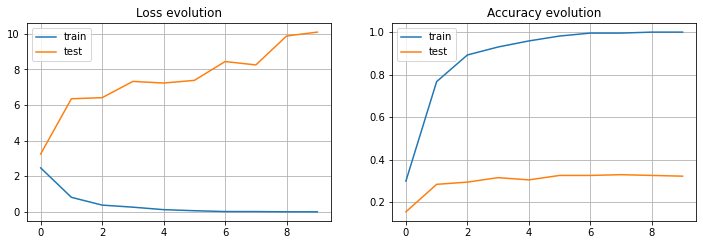

In [12]:
# Small Model 
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_resultsSML = model.fit_generator(
        train_data_small, #training set
        steps_per_epoch = len(train_data_small), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_resultsSML.history['loss'], label='Loss')
plt.plot(training_resultsSML.history['val_loss'], label='val_Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_resultsSML.history['categorical_accuracy'], label='accuracy')
plt.plot(training_resultsSML.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Accuracy evolution')

In [13]:
model.save('/content/drive/MyDrive/ColabNotebooks/',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/assets


In [14]:
new_model = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/')

In [15]:
result_batch = model.predict(test_data)
reloaded_result_batch = new_model.predict(test_data)
(abs(result_batch - reloaded_result_batch)).max()

1.0

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 26)      728       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
flatten (Flatten)            (None, 978536)            0         
_________________________________________________________________
dense (Dense)                (None, 26)                25441962  
_________________________________________________________________
dense_1 (Dense)              (None, 26)                702       
Total params: 25,455,612
Trainable params: 25,455,612
Non-trainable params: 0
____________________________________________

In [17]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 26)      728       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
flatten (Flatten)            (None, 978536)            0         
_________________________________________________________________
dense (Dense)                (None, 26)                25441962  
_________________________________________________________________
dense_1 (Dense)              (None, 26)                702       
Total params: 25,455,612
Trainable params: 25,455,612
Non-trainable params: 0
____________________________________________

In [18]:
def create_model():
  model = Sequential()
  model.add(Conv2D(26, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(Conv2D(26, (3, 3), activation = 'relu'))
  model.add(Conv2D(26, (3, 3), activation = 'relu'))
  model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
  model.add(Dense(26)) #fully-connected layer
  model.add(Dense(26,activation=tf.keras.activations.softmax))

  # need to compile the model before you can use it
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  return model

model = create_model()

Epoch 1/10
2430/2430 [==============================] - 24326s 10s/step - loss: 1.4673 - categorical_accuracy: 0.5469 - val_loss: 0.2125 - val_categorical_accuracy: 0.9266
Epoch 2/10
2430/2430 [==============================] - 174s 72ms/step - loss: 0.2551 - categorical_accuracy: 0.9140 - val_loss: 0.0376 - val_categorical_accuracy: 0.9860
Epoch 3/10
2430/2430 [==============================] - 172s 71ms/step - loss: 0.0929 - categorical_accuracy: 0.9709 - val_loss: 0.0321 - val_categorical_accuracy: 0.9895
Epoch 4/10
2430/2430 [==============================] - 173s 71ms/step - loss: 0.0516 - categorical_accuracy: 0.9844 - val_loss: 0.0442 - val_categorical_accuracy: 0.9895
Epoch 5/10
2430/2430 [==============================] - 172s 71ms/step - loss: 0.0218 - categorical_accuracy: 0.9936 - val_loss: 0.0118 - val_categorical_accuracy: 0.9965
Epoch 6/10
2430/2430 [==============================] - 173s 71ms/step - loss: 0.0244 - categorical_accuracy: 0.9933 - val_loss: 0.0130 - val_ca

Text(0.5, 1.0, 'Accuracy evolution')

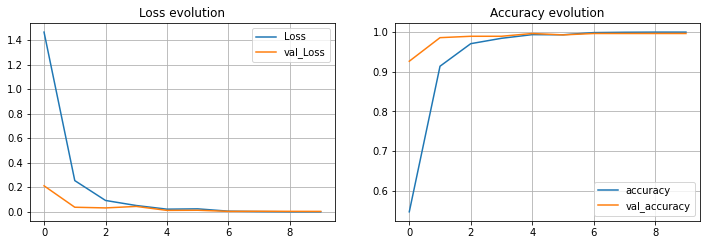

In [19]:
#full-sized Model 
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_results.history['loss'], label='Loss')
plt.plot(training_results.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_results.history['categorical_accuracy'], label='accuracy')
plt.plot(training_results.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [20]:
model.save('/content/drive/MyDrive/ColabNotebooks/FullModel/',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/FullModel/assets


In [21]:
new_modelFULL = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/FullModel/')

In [22]:
result_batch = model.predict(test_data)
reloaded_result_batch = new_modelFULL.predict(test_data)
(abs(result_batch - reloaded_result_batch)).max()

1.0

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 26)      728       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
flatten_1 (Flatten)          (None, 978536)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                25441962  
_________________________________________________________________
dense_3 (Dense)              (None, 26)                702       
Total params: 25,455,612
Trainable params: 25,455,612
Non-trainable params: 0
__________________________________________

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 26)      728       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
flatten (Flatten)            (None, 978536)            0         
_________________________________________________________________
dense (Dense)                (None, 26)                25441962  
_________________________________________________________________
dense_1 (Dense)              (None, 26)                702       
Total params: 25,455,612
Trainable params: 25,455,612
Non-trainable params: 0
____________________________________________

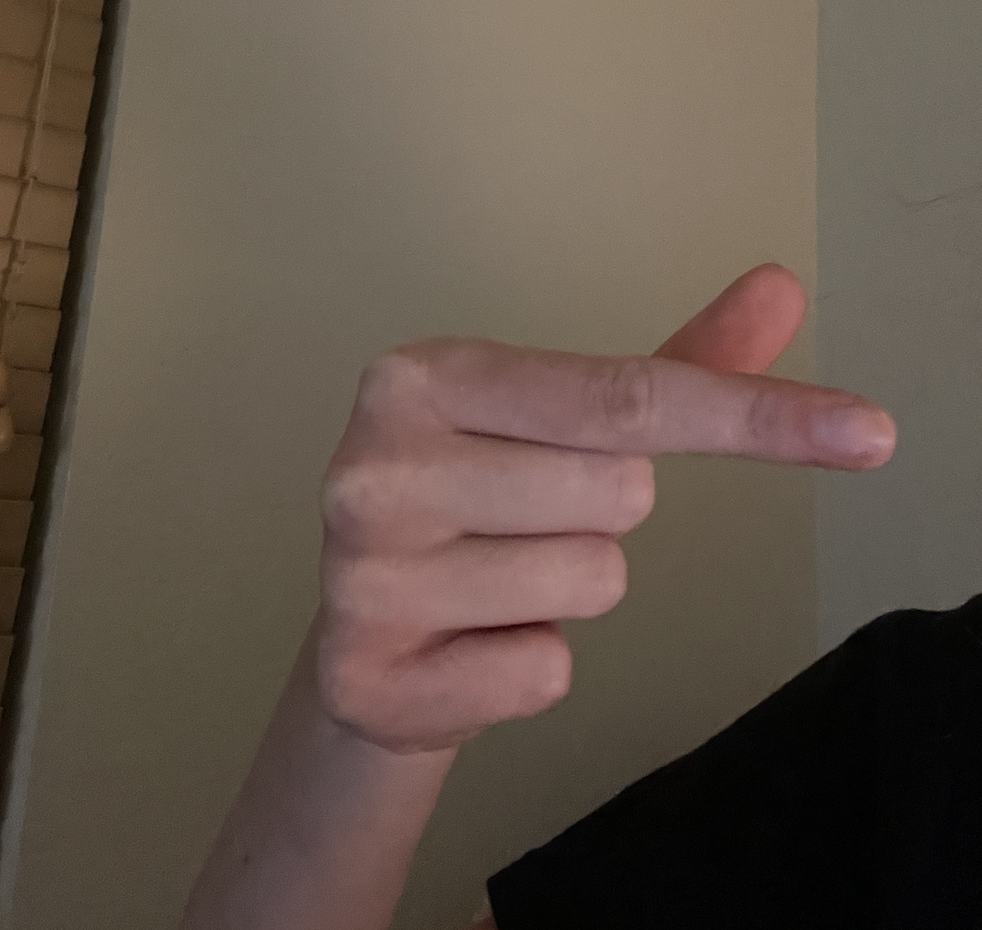

In [25]:
display(Image('/content/drive/MyDrive/ColabNotebooks/G.png', width=200, height=200))

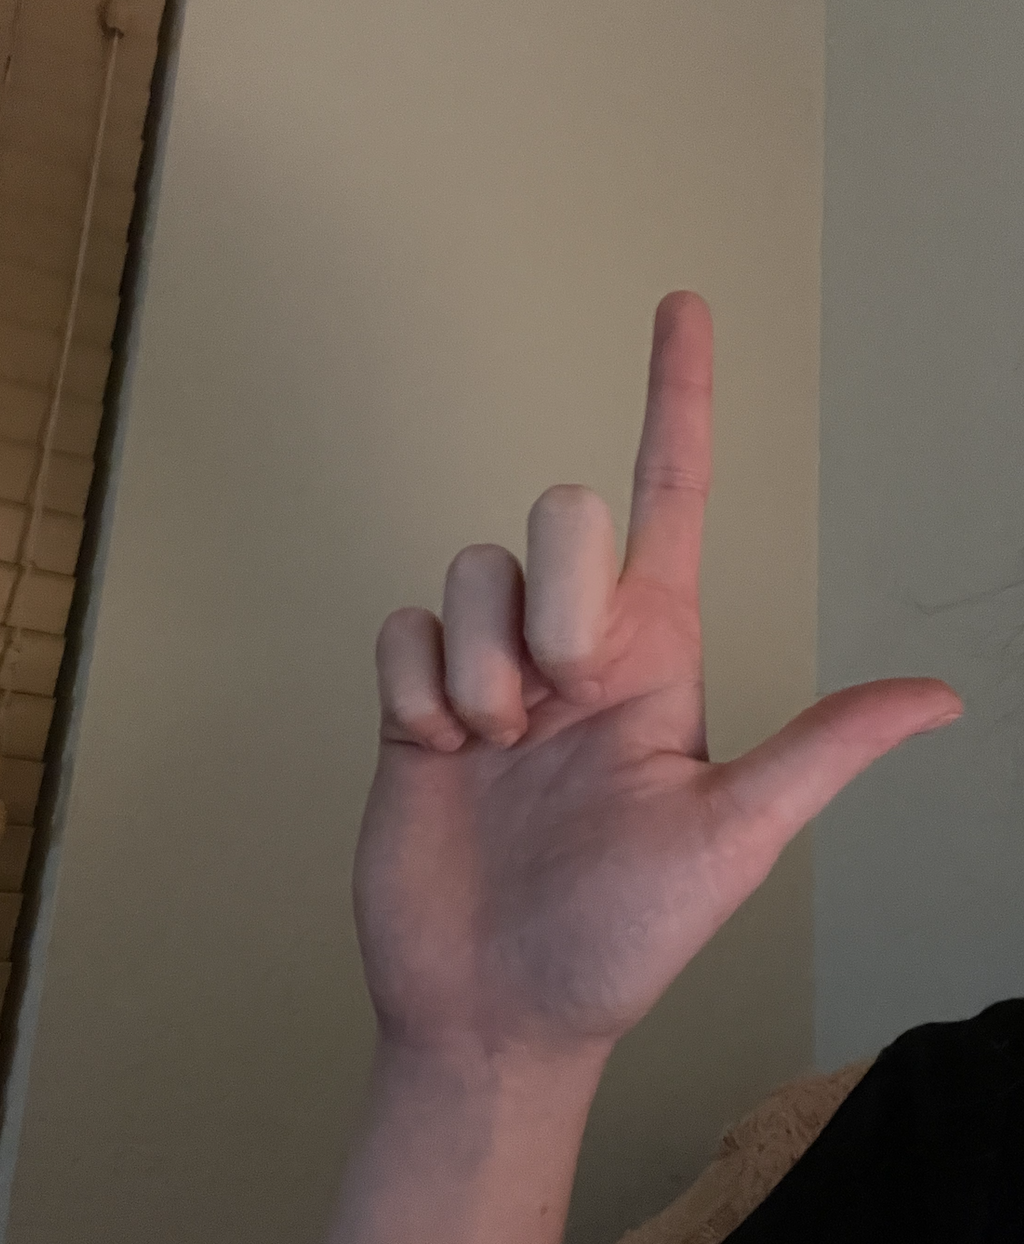

In [26]:
display(Image('/content/drive/MyDrive/ColabNotebooks/L.png', width=200, height=200))

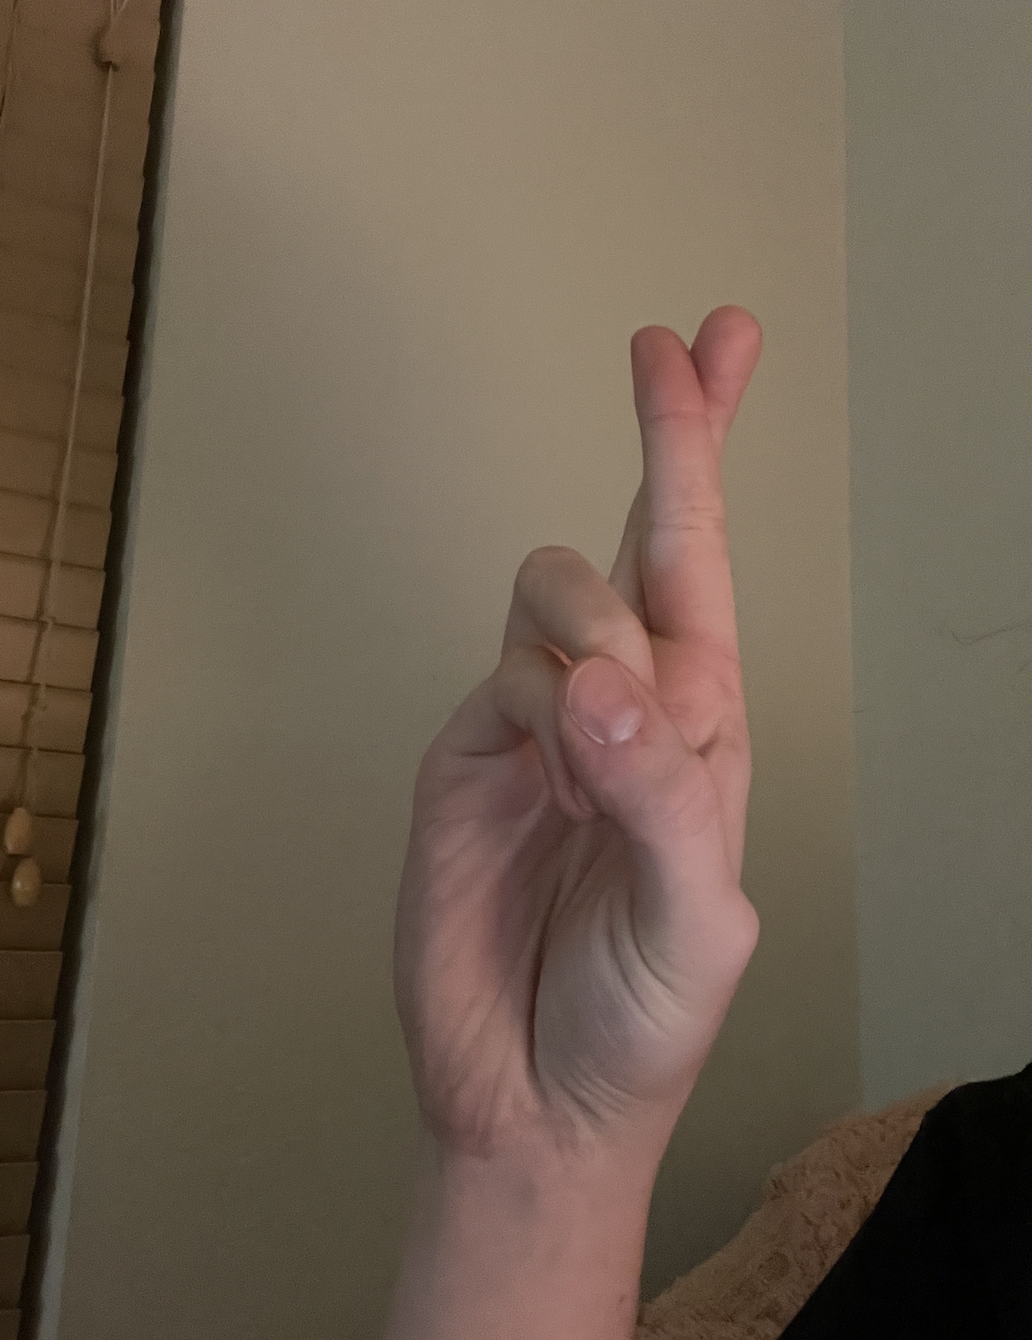

In [27]:
display(Image('/content/drive/MyDrive/ColabNotebooks/R.png', width=200, height=200))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 26)      728       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
flatten_1 (Flatten)          (None, 978536)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                25441962  
_________________________________________________________________
dense_3 (Dense)              (None, 26)                702       
Total params: 25,455,612
Trainable params: 25,455,612
Non-trainable params: 0
__________________________________________

In [29]:
# Batch Normalization
def create_norm_model():
  model2 = Sequential()
  model2.add(Conv2D(26, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model2.add(BatchNormalization())
  model2.add(Conv2D(26, (3, 3), activation = 'relu'))
  model2.add(BatchNormalization())
  model2.add(Conv2D(26, (3, 3), activation = 'relu'))
  model2.add(BatchNormalization())
  model2.add(Flatten())
  model2.add(BatchNormalization()) #flatten the convolutional layer so it can go into a fully-connected layer
  model2.add(Dense(26))
  model2.add(BatchNormalization()) #fully-connected layer
  model2.add(Dense(26,activation=tf.keras.activations.softmax))
  

  # need to compile the model before you can use it
  opt = SGD(lr=0.001, momentum=0.9)
  model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  return model2

model2 = create_norm_model()

Epoch 1/10
41/41 [==============================] - 5s 92ms/step - loss: 1.6586 - categorical_accuracy: 0.6585 - val_loss: 3.3372 - val_categorical_accuracy: 0.0629
Epoch 2/10
41/41 [==============================] - 4s 92ms/step - loss: 0.5826 - categorical_accuracy: 0.9785 - val_loss: 3.3336 - val_categorical_accuracy: 0.1119
Epoch 3/10
41/41 [==============================] - 4s 87ms/step - loss: 0.3082 - categorical_accuracy: 0.9992 - val_loss: 3.2544 - val_categorical_accuracy: 0.0804
Epoch 4/10
41/41 [==============================] - 4s 87ms/step - loss: 0.2213 - categorical_accuracy: 1.0000 - val_loss: 3.2522 - val_categorical_accuracy: 0.1154
Epoch 5/10
41/41 [==============================] - 4s 88ms/step - loss: 0.1787 - categorical_accuracy: 1.0000 - val_loss: 3.4603 - val_categorical_accuracy: 0.1224
Epoch 6/10
41/41 [==============================] - 4s 87ms/step - loss: 0.1555 - categorical_accuracy: 1.0000 - val_loss: 3.7332 - val_categorical_accuracy: 0.1259
Epoch 7/10

Text(0.5, 1.0, 'Accuracy evolution')

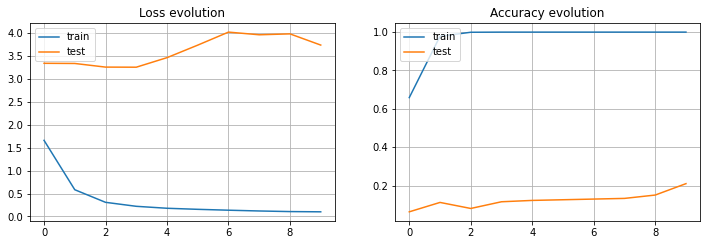

In [30]:
# Small Model 
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_resultsSMLnorm = model2.fit_generator(
        train_data_small, #training set
        steps_per_epoch = len(train_data_small), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_resultsSMLnorm.history['loss'], label='Loss')
plt.plot(training_resultsSMLnorm.history['val_loss'], label='val_Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_resultsSMLnorm.history['categorical_accuracy'], label='accuracy')
plt.plot(training_resultsSMLnorm.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.title('Accuracy evolution')

In [31]:
model2.save('/content/drive/MyDrive/ColabNotebooks/SmlNorm/',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/SmlNorm/assets


In [32]:
new_modelSmlNorm = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/SmlNorm/')

In [33]:
result_batch = model2.predict(test_data)
reloaded_result_batch = new_modelSmlNorm.predict(test_data)
(abs(result_batch - reloaded_result_batch)).max()

0.8444845

In [34]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 26)      728       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 26)      104       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 26)      104       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
batch_normalization_2 (Batch (None, 194, 194, 26)      104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 978536)           

In [35]:
new_modelSmlNorm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 26)      728       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 26)      104       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 26)      104       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
batch_normalization_2 (Batch (None, 194, 194, 26)      104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 978536)           

Epoch 1/10
2430/2430 [==============================] - 180s 74ms/step - loss: 0.7082 - categorical_accuracy: 0.8200 - val_loss: 0.6033 - val_categorical_accuracy: 0.8287
Epoch 2/10
2430/2430 [==============================] - 178s 73ms/step - loss: 0.0749 - categorical_accuracy: 0.9900 - val_loss: 0.0555 - val_categorical_accuracy: 0.9895
Epoch 3/10
2430/2430 [==============================] - 177s 73ms/step - loss: 0.0206 - categorical_accuracy: 0.9990 - val_loss: 0.0145 - val_categorical_accuracy: 1.0000
Epoch 4/10
2430/2430 [==============================] - 178s 73ms/step - loss: 0.0086 - categorical_accuracy: 1.0000 - val_loss: 0.0066 - val_categorical_accuracy: 1.0000
Epoch 5/10
2430/2430 [==============================] - 178s 73ms/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.0108 - val_categorical_accuracy: 1.0000
Epoch 6/10
2430/2430 [==============================] - 178s 73ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.0138 - val_cat

Text(0.5, 1.0, 'Accuracy evolution')

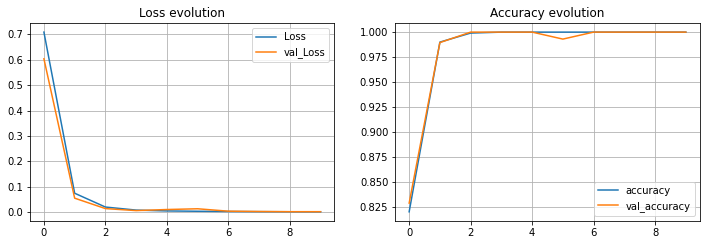

In [36]:
#full-sized Model 
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_resultsNorm = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(training_resultsNorm.history['loss'], label='Loss')
plt.plot(training_resultsNorm.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(training_resultsNorm.history['categorical_accuracy'], label='accuracy')
plt.plot(training_resultsNorm.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [37]:
model2.save('/content/drive/MyDrive/ColabNotebooks/FullNorm/',save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ColabNotebooks/FullNorm/assets


In [38]:
new_modelFullNorm = keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/FullNorm/')

In [39]:
result_batch = model2.predict(test_data)
reloaded_result_batch = new_modelFullNorm.predict(test_data)
(abs(result_batch - reloaded_result_batch)).max()

0.9999975

In [40]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 26)      728       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 26)      104       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 26)      104       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
batch_normalization_2 (Batch (None, 194, 194, 26)      104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 978536)           

In [41]:
new_modelFullNorm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 26)      728       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 26)      104       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 196, 196, 26)      6110      
_________________________________________________________________
batch_normalization_1 (Batch (None, 196, 196, 26)      104       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 194, 194, 26)      6110      
_________________________________________________________________
batch_normalization_2 (Batch (None, 194, 194, 26)      104       
_________________________________________________________________
flatten_2 (Flatten)          (None, 978536)           

In [42]:
# Potential image recognition code??
# testdata is the dataframe of Generator
paths = '/content/drive/MyDrive/ColabNotebooks/G.png' # Your files path

y_pred = model.predict(test_data).argmax(axis=1) # Predict prob and get Class Indices
classes = test_data.class_indices  # Map of Indices to Class name

from keras.preprocessing import image
a_img_rand = np.random.randint(0,len(paths))   # A rand to pick a rand image
img = image.load_img(paths[a_img_rand])       
img = image.img_to_array(img)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
print(f'Class Predicted ---- {list(classes)[y_pred[a_img_rand]]}')

FileNotFoundError: ignored